In [1]:
# Library Imports

import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from pathlib import Path

In [2]:
# Setup and Load Data

from pathlib import Path

cwd = Path.cwd()
BASE_DIR = cwd.parent

MODELS_DIR = BASE_DIR / "models"
DATA_PROCESSED_DIR = BASE_DIR / "data" / "processed"
REPORTS_DIR = BASE_DIR / "reports"
FIGURES_DIR = REPORTS_DIR / "figures"

DATA_PROCESSED_DIR, REPORTS_DIR, FIGURES_DIR

train_path = DATA_PROCESSED_DIR / "panel_country_split_train.csv"
test_path = DATA_PROCESSED_DIR / "panel_country_split_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train Shape:", train_df.shape)
print("Test Shape :", test_df.shape)
train_df.head()


Train Shape: (9917, 6)
Test Shape : (2532, 6)


,Country,Year,fertility,migration,urban_pop,flfp
0,Afghanistan,2006,6.686,57673.0,22.907,41.241034
1,Afghanistan,1974,7.526,-20009.0,13.219,6.830000
2,Afghanistan,1981,7.617,-1998086.0,16.562,9.378966
3,Afghanistan,1993,7.761,1149684.0,21.444,24.672759
4,Afghanistan,1991,7.631,32782.0,21.266,22.123793


In [3]:
# X & Y Split

target_col = "fertility"

X_train = train_df.drop(columns=[target_col, "Country"])  
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col, "Country"])
y_test = test_df[target_col]

In [4]:
# Linear Regression Model

lr_model = LinearRegression(fit_intercept=True,n_jobs=-1)
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [5]:
# Train the Model

lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [6]:
# Predictions

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
print("First 10 Predictions:", y_test_pred[:10])
print("First 10 Predictions:", y_test.values[:10])

First 10 Predictions: [4.69744218 5.09395462 5.36505672 4.62733321 5.77848195 5.28585694
 4.97344497 4.97603286 6.6026867  4.8171878 ]
First 10 Predictions: [7.018 7.641 7.767 6.295 7.553 7.757 5.985 7.174 7.561 5.879]


In [7]:
# Performance Metrics

# Train Metrics

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test Metrics

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("=== Linear Regression Performance Metrics ===")
print(f"Train - MAE : {train_mae:.4f}")
print(f"Train - RMSE: {train_rmse:.4f}")
print(f"Train - R²  : {train_r2:.4f}")
print()
print(f"Test  - MAE : {test_mae:.4f}")
print(f"Test  - RMSE: {test_rmse:.4f}")
print(f"Test  - R²  : {test_r2:.4f}")


=== Linear Regression Performance Metrics ===
Train - MAE : 1.1599
Train - RMSE: 1.4205
Train - R²  : 0.4977

Test  - MAE : 1.1837
Test  - RMSE: 1.4446
Test  - R²  : 0.5012


In [8]:
# Feature Coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})

# Print sorted coefficients
coefficients_print = coefficients.sort_values(
    by="Coefficient", key=abs, ascending=False
)
print("\n=== Feature Katsayıları ===")
print(coefficients_print)


=== Feature Katsayıları ===
     Feature   Coefficient
2  urban_pop -4.333012e-02
0       Year -2.990975e-02
3       flfp -1.962717e-02
1  migration  4.207014e-07


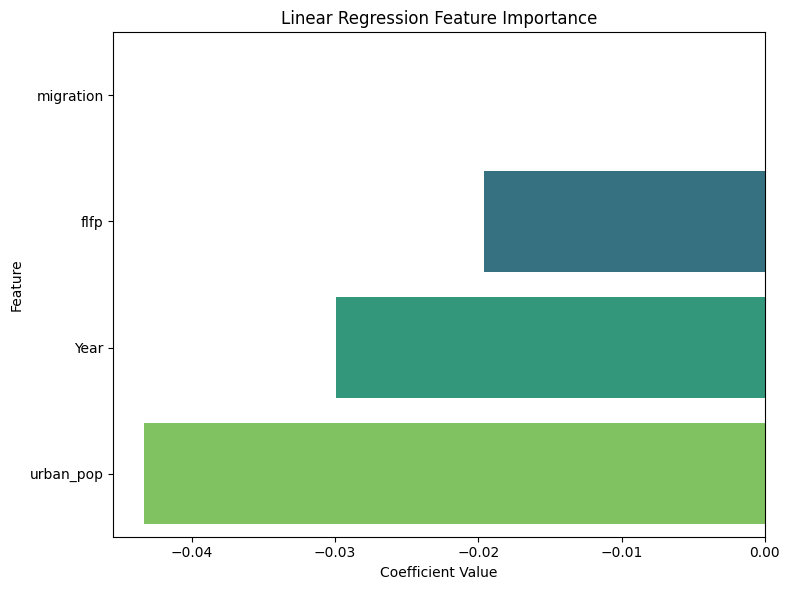

In [ ]:
import os

# Make sure the folder exists
os.makedirs("../reports/figures", exist_ok=True)

# Prepare for plot
coefficients_sorted = coefficients.copy()
coefficients_sorted["abs_coef"] = coefficients_sorted["Coefficient"].abs()
coefficients_sorted = coefficients_sorted.sort_values(
    by="abs_coef", ascending=True
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coefficients_sorted,
    hue="Feature",
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()

# Save figure (one level up)
plt.savefig("../reports/figures/linear_regression_feature_importance.png",
            dpi=300,
            bbox_inches="tight")

plt.show()

In [10]:
# Save Predictions 

results_df = X_test.copy()
results_df["Actual"] = y_test
results_df["Predicted"] = y_test_pred

predictions_path = DATA_PROCESSED_DIR / "linear_regression_predictions.csv"
results_df.to_csv(predictions_path, index=False)
print(f"Predictions saved to: {predictions_path}")

# Save Performance Metrics

metrics = {
    "Train": {"R2": train_r2, "RMSE": train_rmse, "MAE": train_mae},
    "Test": {"R2": test_r2, "RMSE": test_rmse, "MAE": train_mae}
    
}

metrics_path = MODELS_DIR / "linear_regression_metrics.json"
with open(metrics_path, "w", encoding="utf-8") as f:
    json.dump(metrics, f, indent=4)
print(f"Metrics saved to: {metrics_path}")

# Save Feature Coefficients

coefficients_path = DATA_PROCESSED_DIR / "linear_regression_coefficients.csv"
coefficients.to_csv(coefficients_path, index=False)
print(f"Feature coefficients saved to: {coefficients_path}")

Predictions saved to: d:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\data\processed\linear_regression_predictions.csv
Metrics saved to: d:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\models\linear_regression_metrics.json
Feature coefficients saved to: d:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\data\processed\linear_regression_coefficients.csv
